# Geometric Distribution
***
## Definition
>The Geometric distribution is a discrete distribution and gives the probability that the first occurrence of success requires k independent trials [a.k.a. Bernoulli trials], each with success probability p. $ ^{[1]}$.

## Formula
The probability mass function of a Geometric distributed random variable is defined as:
$$ Geom(k|p) = (1-p)^{k-1}p $$
where $p$ denotes the probability of success in a Bernoulli trial.

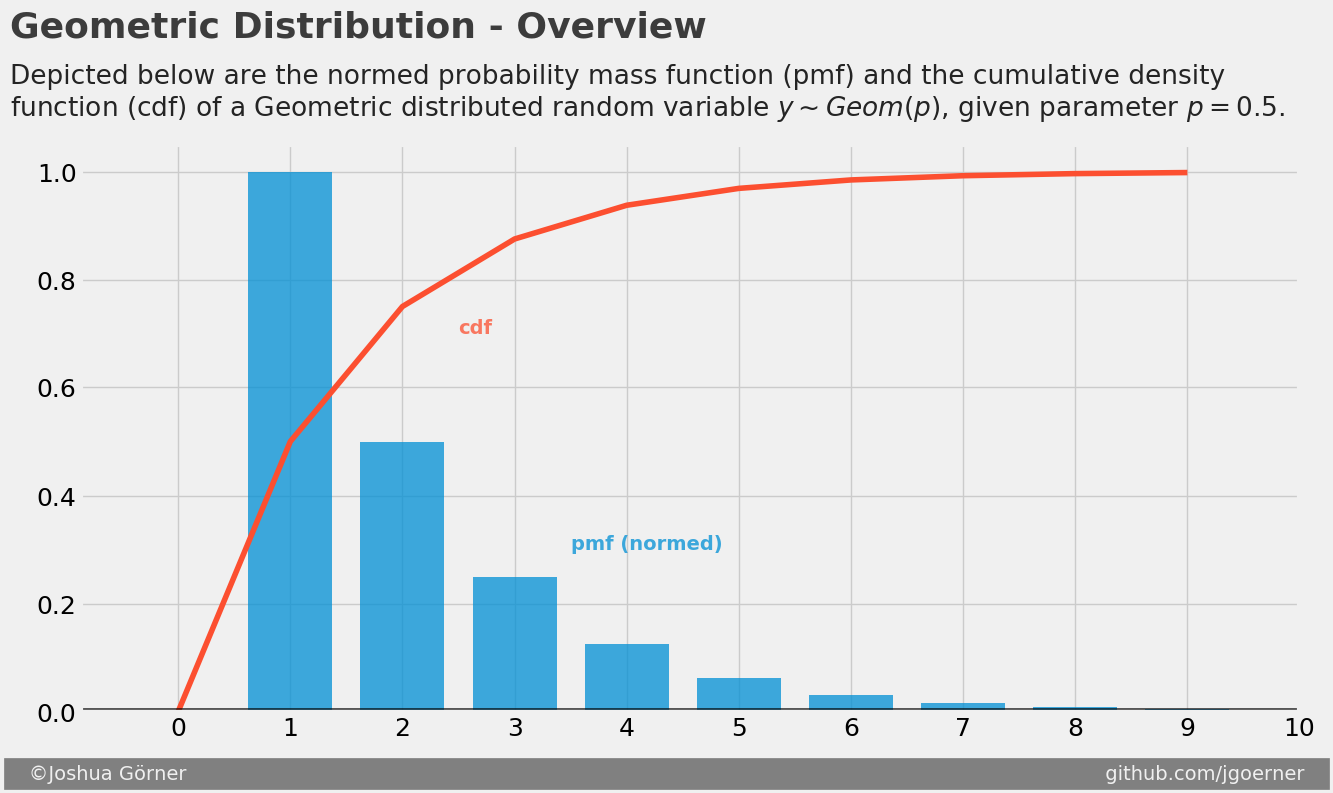

In [2]:
# %load ../src/geometric/01_general.py

***
## Parameters

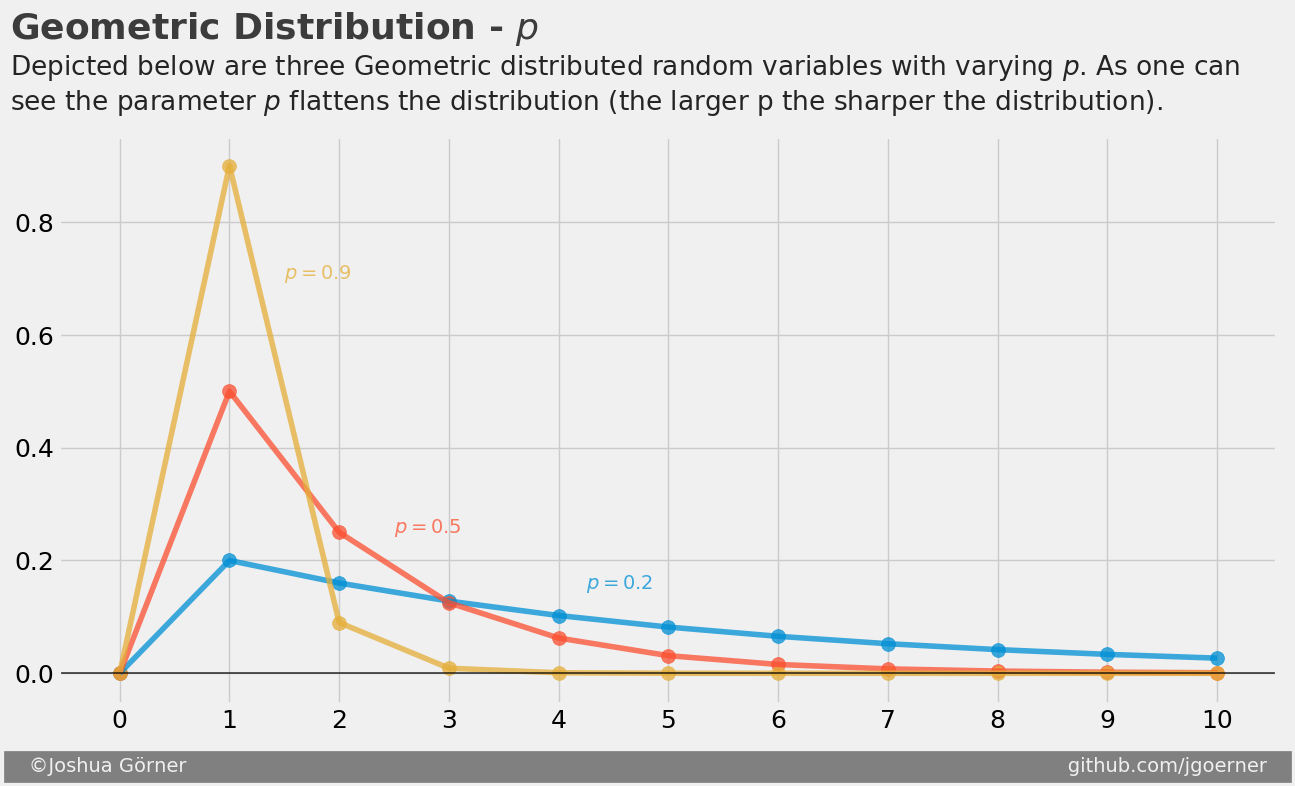

In [4]:
# %load ../src/geometric/02_p.py

*** 
## Implementation in Python
Multiple Python packages implement the Geometric distribution. One of those is the `stats.geom` module from the `scipy` package. The following methods are only an excerpt. For a full list of features the [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html) should be read.

### Random Variates
In order to generate a random sample from, the function `rvs` should be used. 

In [5]:
import numpy as np
from scipy.stats import geom

# draw a single sample
np.random.seed(42)
print(geom.rvs(p=0.3), end="\n\n")

# draw 10 samples
print(geom.rvs(p=0.3, size=10), end="\n\n")

2

[9 4 3 1 1 1 6 3 4 1]



### Probability Mass Function
The probability mass function can be accessed via the `pmf` function (mass instead of density since the Geometric distribution is discrete). Like the `rvs` method, the `pdf` allows for adjusting the $p$ of the random variable:

pmf(X=1) = 0.3
pmf(X=7) = 0.035294699999999984


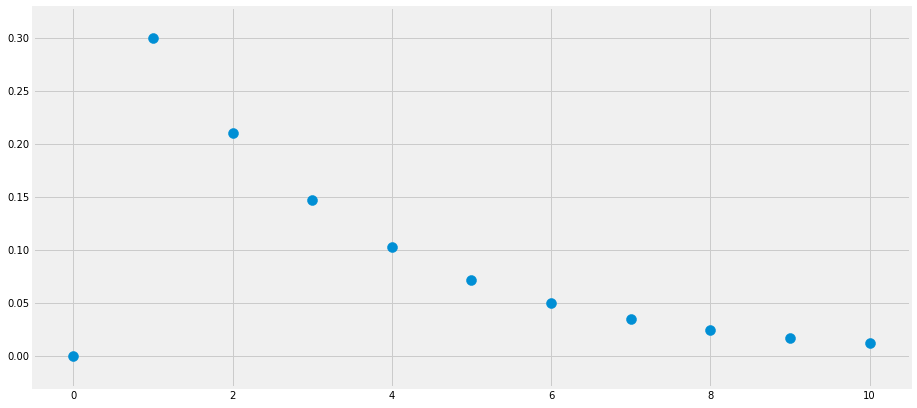

In [6]:
import numpy as np
from scipy.stats import geom

# additional imports for plotting purpose
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,7)

# likelihood of x and y
x = 1
y = 7
print("pmf(X=1) = {}\npmf(X=7) = {}".format(geom.pmf(k=x, p=0.3), geom.pmf(k=y, p=0.3)))

# continuous pdf for the plot
x_s = np.arange(11)
y_s = geom.pmf(k=x_s, p=0.3)
plt.scatter(x_s, y_s, s=100);

### Cumulative Probability Density Function
The cumulative probability density function is useful when a probability range has to be calculated. It can be accessed via the `cdf` function:

In [7]:
from scipy.stats import geom

# probability of x less or equal 0.3
print("P(X <=3) = {}".format(geom.cdf(k=3, p=0.3)))

# probability of x in [-0.2, +0.2]
print("P(2 < X <= 8) = {}".format(geom.cdf(k=8, p=0.3) - geom.cdf(k=2, p=0.3)))

P(X <=3) = 0.6569999999999999
P(2 < X <= 8) = 0.43235199


***
## Infering $p$

Given a sample of datapoints it is often required to estimate the "true" parameters of the distribution. In the case of the Geometric distribution this estimation is quite simple. $p$ can be derived by calculating the reciprocal of the sample's mean. 

Estimated p: 0.31746031746031744


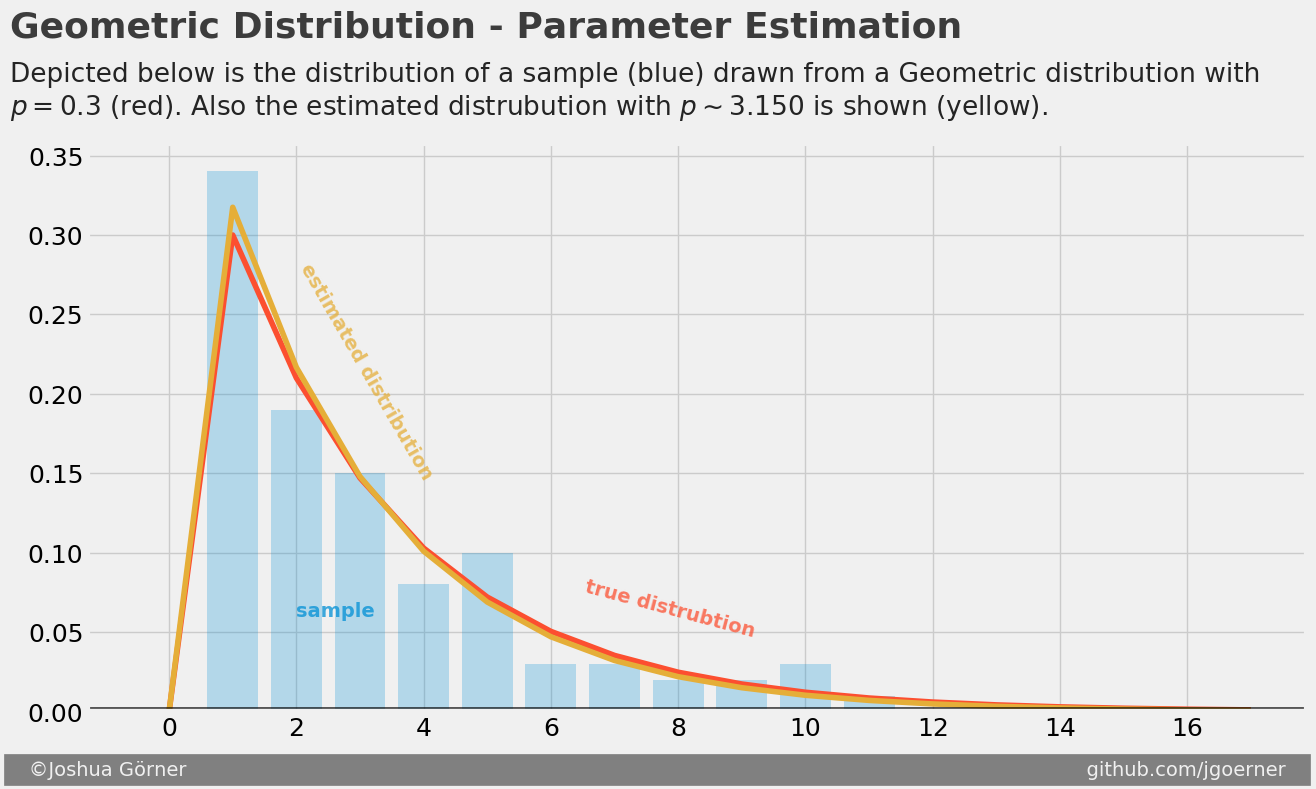

In [9]:
# %load ../src/geometric/03_estimation.py

## Infering $p$ - MCMC
In addition to a direct estimation from the sample $p$ can also be estimated using Markov chain Monte Carlo simulation - implemented in Python's [PyMC3](https://github.com/pymc-devs/pymc3).

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
100%|██████████| 100500/100500 [00:20<00:00, 4836.20it/s]


95% of sampled ps are between 0.266 and 0.372


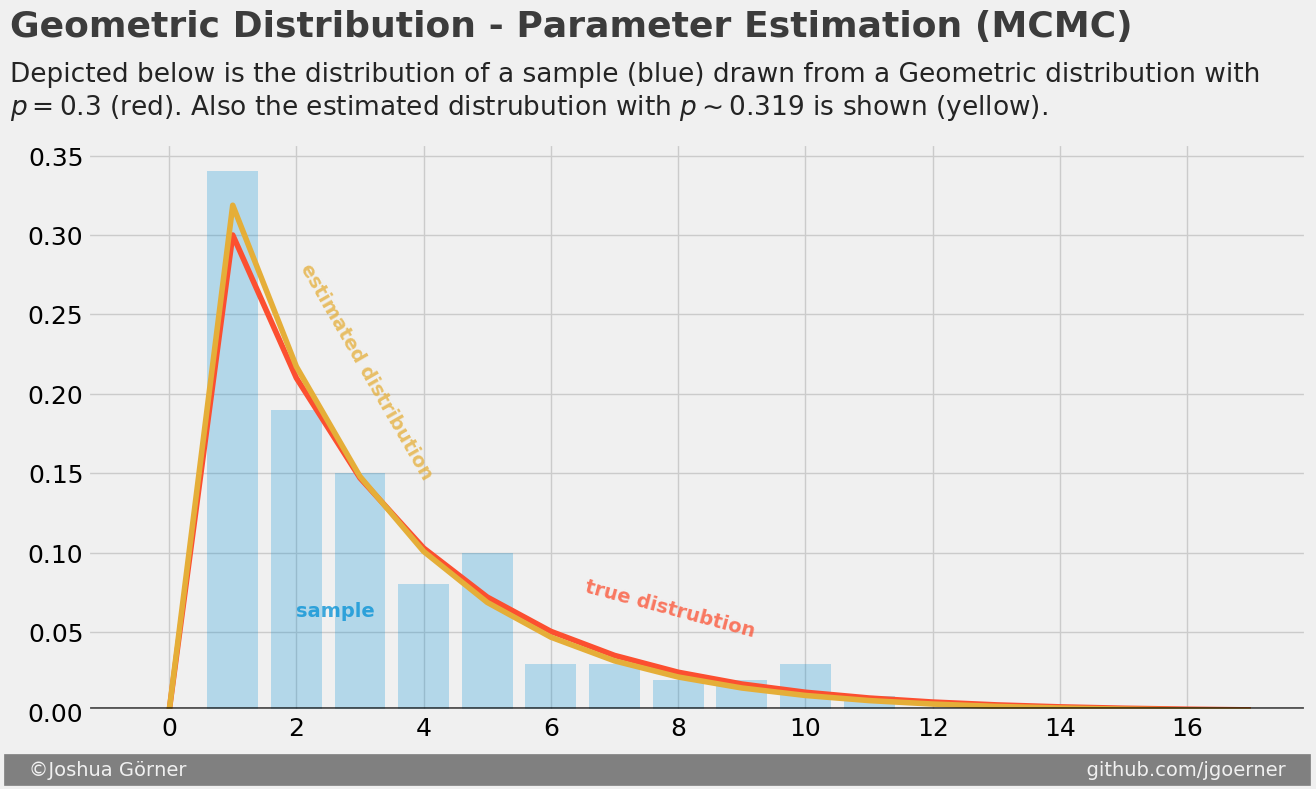

In [12]:
# %load ../src/geometric/04_MCMC_estimation.py

***
[1] - [Wikipedia. Geometric Distribution](https://en.wikipedia.org/wiki/Geometric_distribution)